# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.235083e+01     6.980736e+00
 * time: 0.0060880184173583984
     1     2.919314e+01     4.928188e+00
 * time: 0.01694202423095703
     2     2.400487e+01     8.519276e+00
 * time: 0.045387983322143555
     3     1.349289e+01     2.264604e+00
 * time: 0.07813310623168945
     4     1.200364e+01     2.470025e+00
 * time: 0.09818696975708008
     5     1.167455e+01     1.838618e+00
 * time: 0.11799097061157227
     6     1.065380e+01     1.472727e+00
 * time: 0.13713502883911133
     7     9.979730e+00     1.897855e+00
 * time: 0.1572589874267578
     8     9.614419e+00     1.295028e+00
 * time: 0.17618012428283691
     9     9.359730e+00     9.142529e-01
 * time: 0.19486594200134277
    10     9.158438e+00     6.655850e-01
 * time: 0.213547945022583
    11     9.011352e+00     6.368345e-01
 * time: 0.23345708847045898
    12     8.931274e+00     4.378954e-01
 * time: 0.25360894203186035
    13     8.910489e+00     6.632255e-01
 * time:

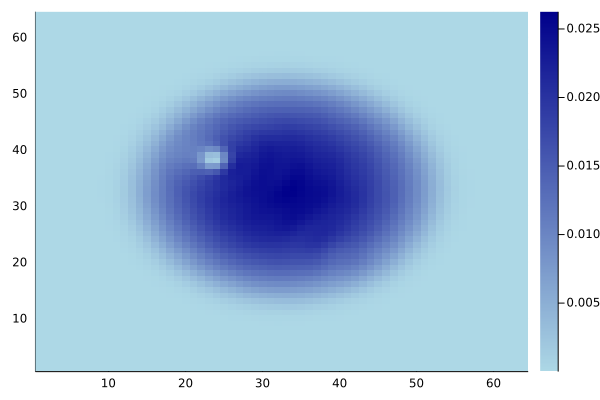

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)